## <font color=brown> Problem Statement </font>

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### <font color=brown>Importing Libraries</font>

In [81]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

### <font color=brown>Understanding Data</font>

In [82]:
# Reading Dataset 
hp = pd.read_csv("/Users/shweta/Downloads/Advanced Regression - House price pred - train dataset.csv")

In [83]:
# Printing head of Dataset
pd.set_option("display.max_columns", 100)
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
# Printing shape of dataset
hp.shape

(1460, 81)

In [85]:
# Checking for Datatypes and NULL value count 
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [86]:
# Printing statistical summary of Dataset for Numerical and Categorical columns 
hp.describe([0.25,0.50,0.75,0.99], include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

1. Data shows presence of Outliers 
2. There are few columns with very low variance. We should drop these columns 

In [87]:
# Checking NULL values in each column 
pd.set_option("display.max_rows", 100)
hp.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

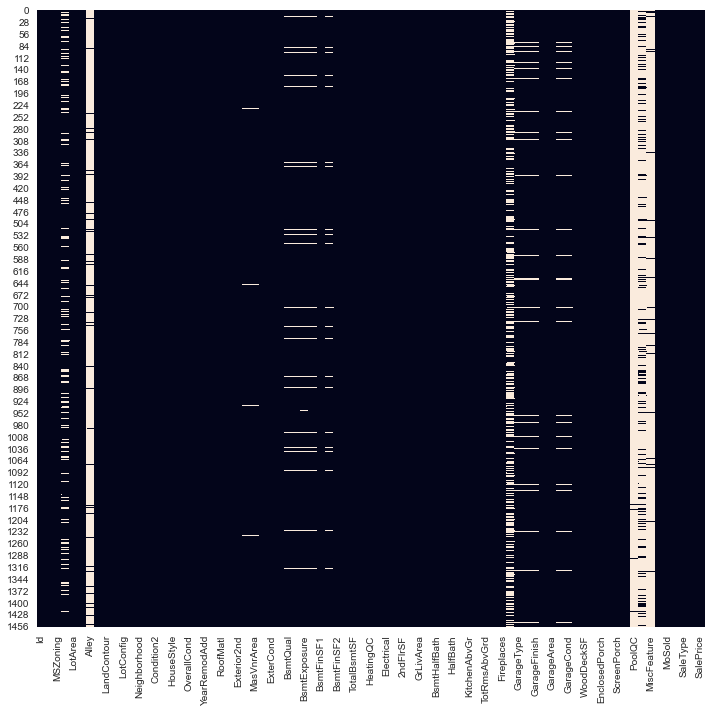

In [88]:
# Plotting graph of Null values present in Dataset 
plt.figure(figsize=(10,10))
sns.heatmap(hp.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [89]:
# Checking percentage of Null values in each column 
pd.set_option("display.max_rows", 100)
round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

### <font color=brown> Data Cleaning and Preparation </font>

In [90]:
# Dropping columns with null values more than 45%
hp.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns', inplace = True)

In [91]:
# Checking shape of Dataset after dropping columns 
hp.shape

(1460, 76)

In [92]:
pd.set_option("display.max_rows", 100)
round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False).head(15)

LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageCond       5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
RoofStyle        0.00
dtype: float64

In [93]:
# Convert the Year columns with the age where we are going to fill these columns with number.If we query the max year for all these columns these will come out to be 2010 ,eg. suppose the YearBuilt=2005 , Then YearBuiltOld = 2010-2005 =5
hp['YearBuilt_Old'] = hp.YearBuilt.max()-hp.YearBuilt
hp['YearRemodAdd_Old'] = hp.YearRemodAdd.max()-hp.YearRemodAdd
hp['GarageYrBlt_Old'] = hp.GarageYrBlt.max()-hp.GarageYrBlt
hp['YrSold_Old'] = hp.YrSold.max()-hp.YrSold
hp[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1264,1998,1999,1998.0,2008,12,11,12.0,2
749,1945,1950,1945.0,2009,65,60,65.0,1
556,1957,1957,1957.0,2006,53,53,53.0,4
710,1935,2003,NaN,2008,75,7,NaN,2
1213,1965,2001,1965.0,2006,45,9,45.0,4
761,1924,1950,1965.0,2009,86,60,45.0,1
570,1965,1965,1987.0,2008,45,45,23.0,2
1276,1972,1972,1972.0,2009,38,38,38.0,1
1330,2006,2006,2006.0,2007,4,4,4.0,3
1006,1970,1970,1970.0,2007,40,40,40.0,3


In [94]:
hp.shape

(1460, 80)

In [95]:
# Drop the actual Year columns 
hp = hp.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [96]:
hp.shape

(1460, 76)

In [97]:
# Checking for null values present 
pd.set_option("display.max_rows", 100)
round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False).head(15)

LotFrontage        17.74
GarageFinish        5.55
GarageQual          5.55
GarageCond          5.55
GarageType          5.55
GarageYrBlt_Old     5.55
BsmtExposure        2.60
BsmtFinType2        2.60
BsmtFinType1        2.53
BsmtCond            2.53
BsmtQual            2.53
MasVnrArea          0.55
MasVnrType          0.55
Electrical          0.07
BsmtFinSF1          0.00
dtype: float64

In [98]:
# Analysing 'LotFrontage' column 
hp.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [99]:
# Imputing 'LotFrontage' column's null values with Median 
hp['LotFrontage'].fillna((hp['LotFrontage'].median()), inplace=True)

In [100]:
hp.LotFrontage.describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [101]:
pd.set_option("display.max_rows", 100)
round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False).head(15)

GarageFinish       5.55
GarageCond         5.55
GarageQual         5.55
GarageType         5.55
GarageYrBlt_Old    5.55
BsmtExposure       2.60
BsmtFinType2       2.60
BsmtFinType1       2.53
BsmtCond           2.53
BsmtQual           2.53
MasVnrArea         0.55
MasVnrType         0.55
Electrical         0.07
RoofStyle          0.00
RoofMatl           0.00
dtype: float64

In [102]:
# Imputing missing values for another columns

hp.GarageFinish.fillna('Unf',inplace=True)
hp.GarageQual.fillna('TA',inplace=True)
hp.GarageCond.fillna('TA',inplace=True)
hp.GarageType.fillna('Attchd',inplace=True)
hp.BsmtExposure.fillna('No',inplace=True)
hp.BsmtFinType1.fillna('Unf',inplace=True)
hp.BsmtFinType2.fillna('Unf',inplace=True)
hp.BsmtQual.fillna('TA',inplace=True)
hp.BsmtCond.fillna('TA',inplace=True)
hp.MasVnrType.fillna('None',inplace=True)
hp.Electrical.fillna('SBrkr', inplace = True )
hp.MasVnrArea.fillna(hp.MasVnrArea.mean(),inplace=True)



In [103]:
# Checking null values 
pd.set_option("display.max_rows", 100)
round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False)

GarageYrBlt_Old     5.55
YrSold_Old          0.00
BsmtQual            0.00
Exterior1st         0.00
Exterior2nd         0.00
MasVnrType          0.00
MasVnrArea          0.00
ExterQual           0.00
ExterCond           0.00
Foundation          0.00
BsmtCond            0.00
BsmtExposure        0.00
BsmtFinType1        0.00
BsmtFinSF1          0.00
BsmtFinType2        0.00
BsmtFinSF2          0.00
BsmtUnfSF           0.00
TotalBsmtSF         0.00
RoofMatl            0.00
RoofStyle           0.00
OverallCond         0.00
OverallQual         0.00
MSSubClass          0.00
MSZoning            0.00
LotFrontage         0.00
LotArea             0.00
Street              0.00
LotShape            0.00
LandContour         0.00
Utilities           0.00
LotConfig           0.00
LandSlope           0.00
Neighborhood        0.00
Condition1          0.00
Condition2          0.00
BldgType            0.00
HouseStyle          0.00
Heating             0.00
HeatingQC           0.00
CentralAir          0.00


In [104]:
# Checking null values in GarageYrBlt_Old column 
hp.GarageYrBlt_Old.isnull().sum()

81

In [105]:
hp.GarageYrBlt_Old.describe()

count    1379.000000
mean       31.493836
std        24.689725
min         0.000000
25%         8.000000
50%        30.000000
75%        49.000000
max       110.000000
Name: GarageYrBlt_Old, dtype: float64

In [106]:
# Imputing null values of GarageYrBlt_Old column 
hp.GarageYrBlt_Old.fillna(0,inplace=True)

In [107]:
hp.GarageYrBlt_Old.describe()

count    1460.000000
mean       29.746575
std        25.054953
min         0.000000
25%         7.000000
50%        25.500000
75%        48.000000
max       110.000000
Name: GarageYrBlt_Old, dtype: float64

In [108]:
# Final check for Null values 
pd.set_option("display.max_rows", 100)
round(100*(hp.isnull().sum()/len(hp.index)), 2).sort_values(ascending=False)

YrSold_Old          0.0
BsmtQual            0.0
Exterior1st         0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
ExterCond           0.0
Foundation          0.0
BsmtCond            0.0
GarageYrBlt_Old     0.0
BsmtExposure        0.0
BsmtFinType1        0.0
BsmtFinSF1          0.0
BsmtFinType2        0.0
BsmtFinSF2          0.0
BsmtUnfSF           0.0
TotalBsmtSF         0.0
RoofMatl            0.0
RoofStyle           0.0
OverallCond         0.0
OverallQual         0.0
MSSubClass          0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
Street              0.0
LotShape            0.0
LandContour         0.0
Utilities           0.0
LotConfig           0.0
LandSlope           0.0
Neighborhood        0.0
Condition1          0.0
Condition2          0.0
BldgType            0.0
HouseStyle          0.0
Heating             0.0
HeatingQC           0.0
CentralAir          0.0
GarageArea          0.0
GarageCond      

In [109]:
hp.shape

(1460, 76)

In [110]:
# Dropping columns with very low variance 
hp.drop(['LandContour','Id','Street','Utilities','LandSlope','Condition2','RoofMatl','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'],axis='columns', inplace = True)

In [111]:
hp.shape

(1460, 62)

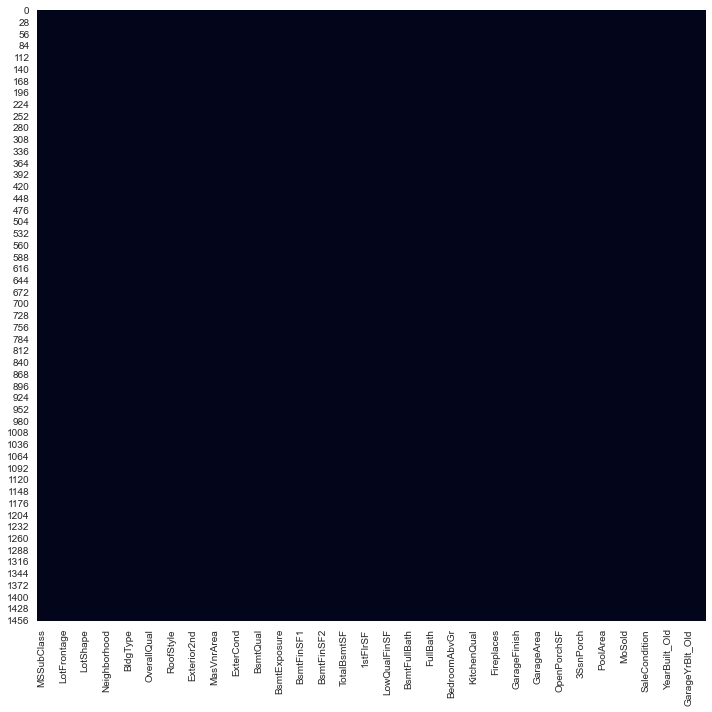

In [112]:
# Plotting graph to check if any null values are present 
plt.figure(figsize=(10,10))
sns.heatmap(hp.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [113]:
# Dropping duplicates if present 
hp.drop_duplicates()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,WD,Normal,250000,10,10,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Inside,Gilbert,Norm,1Fam,2Story,6,5,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,Ex,953,694,0,1647,0,0,2,1,3,1,TA,7,1,Attchd,RFn,2,460,0,40,0,0,0,0,0,8,WD,Normal,175000,11,10,11.0,3
1456,20,RL,85.0,13175,Reg,Inside,NWAmes,Norm,1Fam,1Story,6,6,Gable,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,TA,2073,0,0,2073,1,0,2,0,3,1,TA,7,2,Attchd,Unf,2,500,349,0,0,0,0,0,0,2,WD,Normal,210000,32,22,32.0,0
1457,70,RL,66.0,9042,Reg,Inside,Crawfor,Norm,1Fam,2Story,7,9,Gable,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,Ex,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,2,Attchd,RFn,1,252,0,60,0,0,0,0,2500,5,WD,Normal,266500,69,4,69.0,0
1458,20,RL,68.0,9717,Reg,Inside,NAmes,Norm,1Fam,1Story,5,6,Hip,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gd,1078,0,0,1078,1,0,1,0,2,1,Gd,5,0,Attchd,Unf,1,240,366,0,112,0,0,0,0,4,WD,Normal,142125,60,14,60.0,0


### <font color=brown> Data Visualisation </font>

In [114]:
# Identifying all numerical features and storing them in one variable 
numerical_features = [feature for feature in hp.columns if hp[feature].dtypes != 'O']

In [115]:
hp[numerical_features]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,7,7,7.0,2
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,34,34,34.0,3
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,9,8,9.0,2
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000,95,40,12.0,4
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000,10,10,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,175000,11,10,11.0,3
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,210000,32,22,32.0,0
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,266500,69,4,69.0,0
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,142125,60,14,60.0,0


In [116]:
# Numerical variables are usually of 2 type: Continous variable and Discrete Variables

# Identifying all discrete features and storing them in one variable 
discrete_feature=[feature for feature in numerical_features if len(hp[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [117]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold_Old']

In [118]:
hp[discrete_feature]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold_Old
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,3
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,4
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8,3
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2,0
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5,0
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4,0


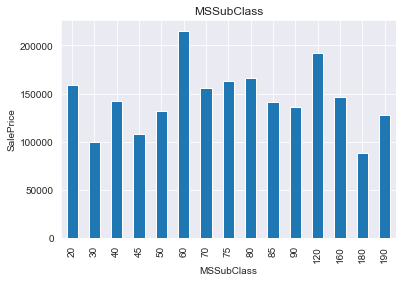

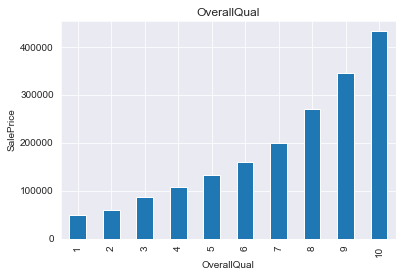

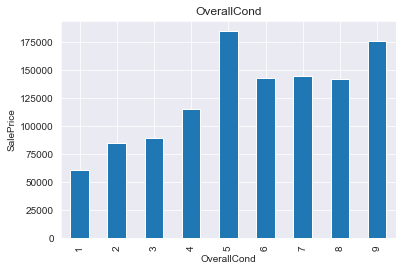

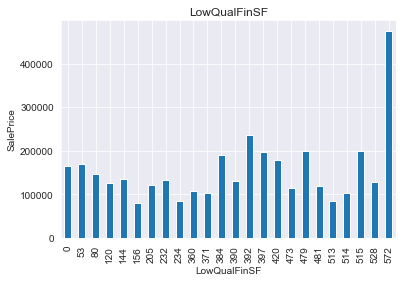

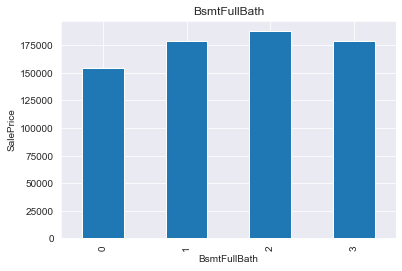

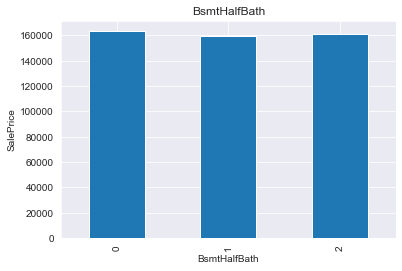

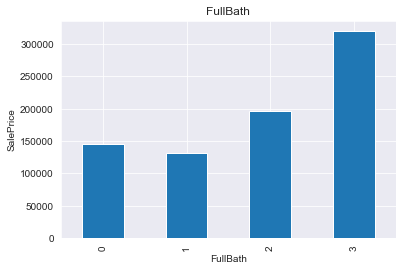

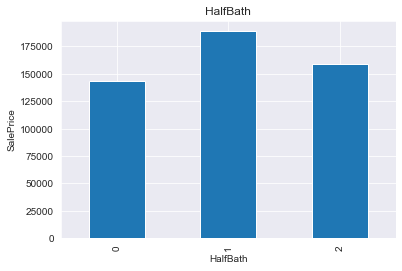

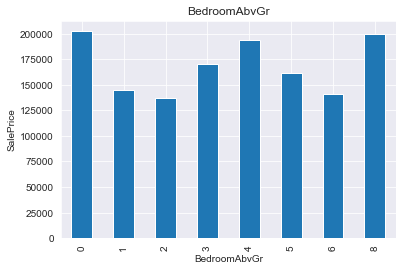

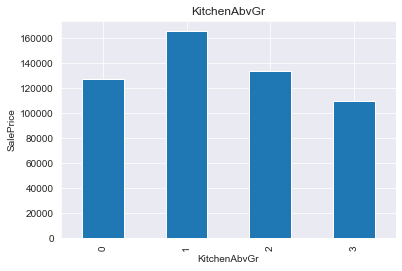

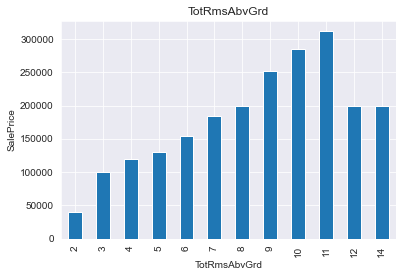

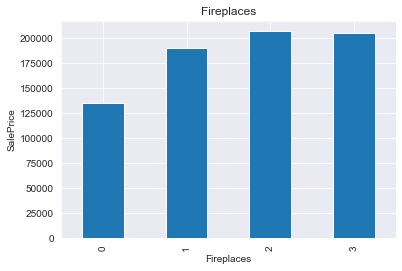

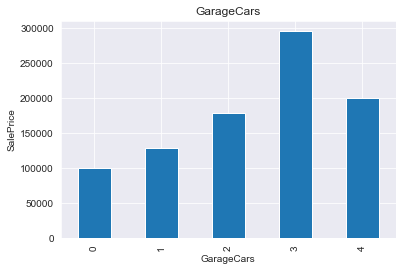

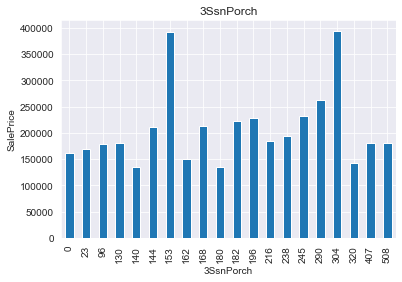

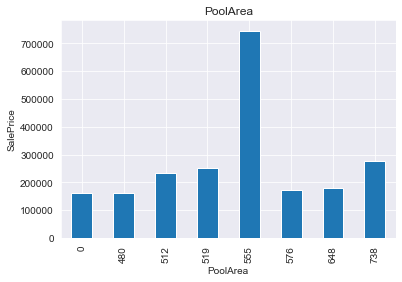

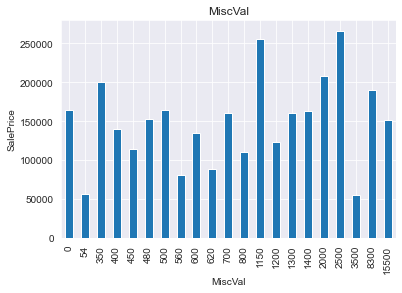

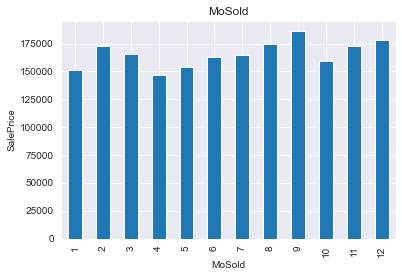

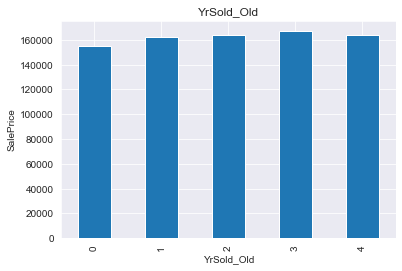

In [119]:
# Finding the realtionship between discrete features and Sale Price

for feature in discrete_feature:
    data=hp.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [120]:
# Identifying all continuous features and storing them in one variable 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


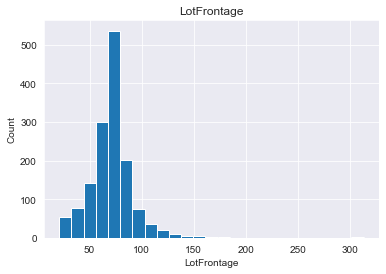

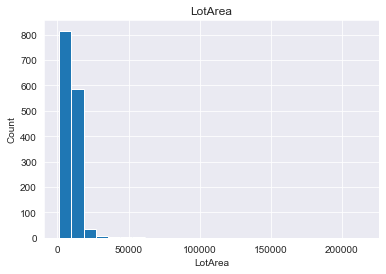

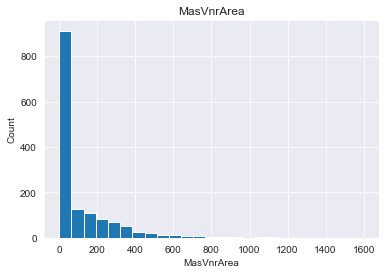

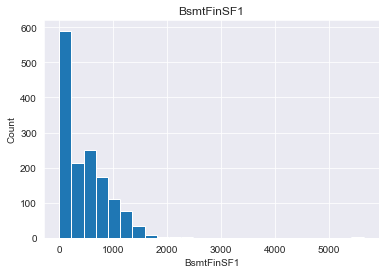

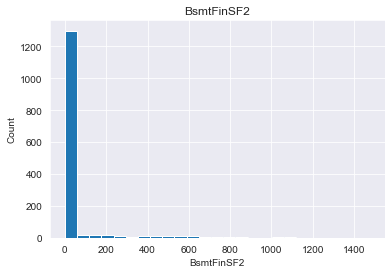

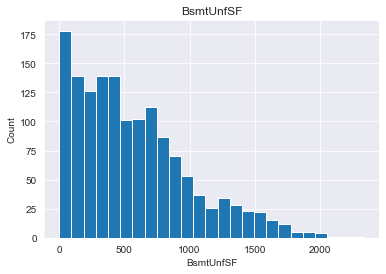

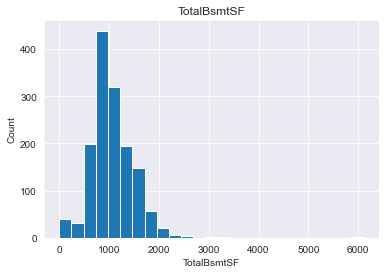

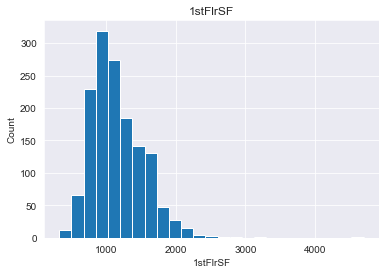

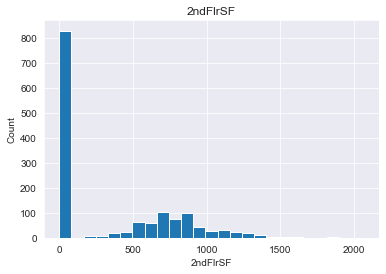

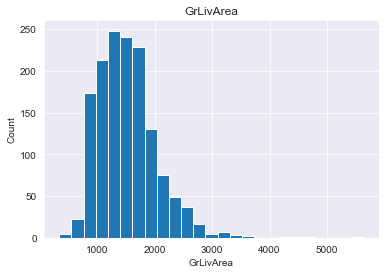

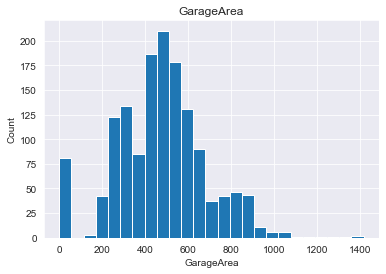

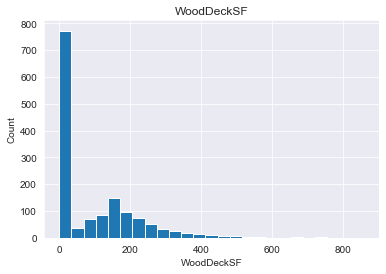

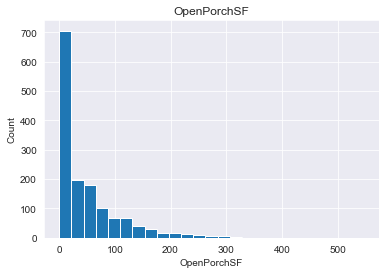

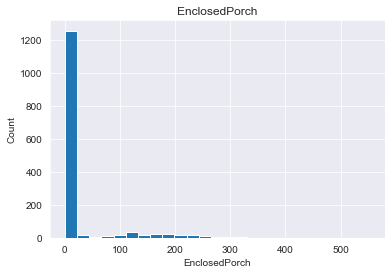

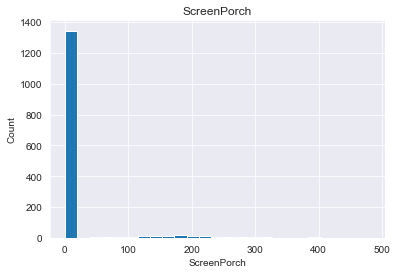

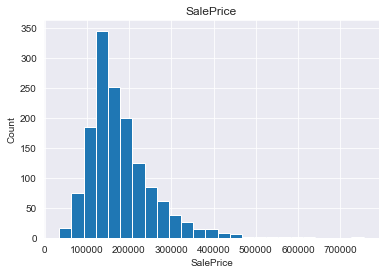

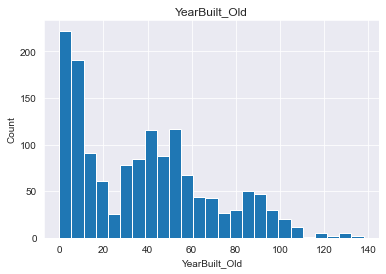

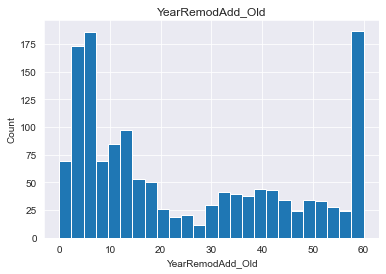

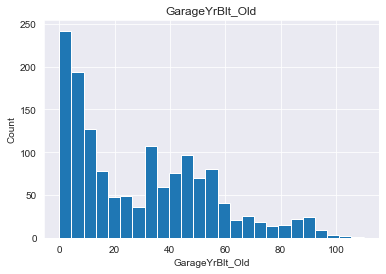

In [121]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=hp.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

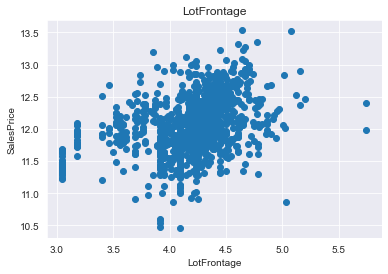

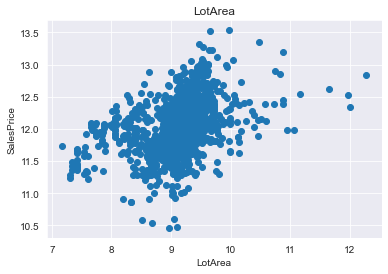

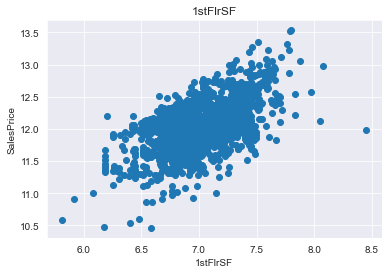

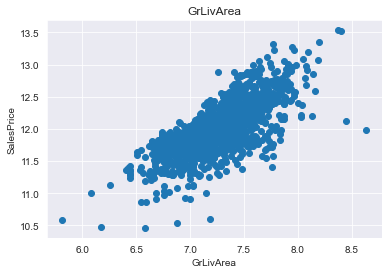

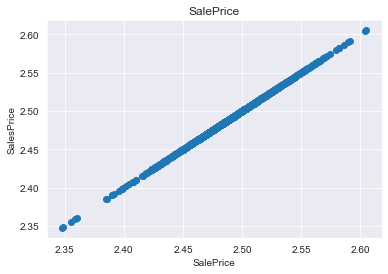

In [122]:
# Using log transformation


for feature in continuous_feature:
    data=hp.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

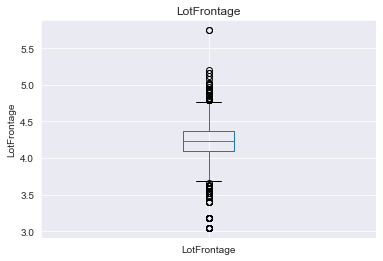

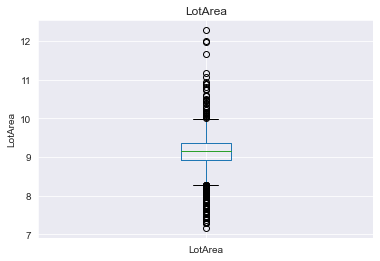

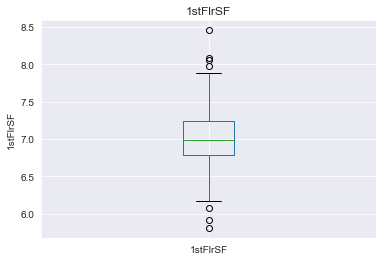

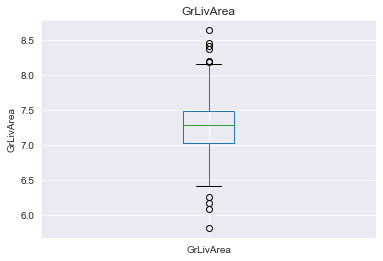

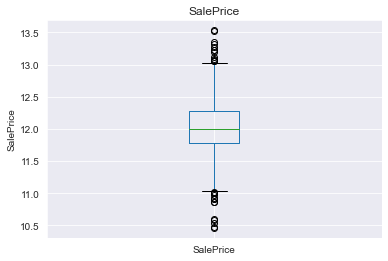

In [123]:
# Outlier Analysis 

for feature in continuous_feature:
    data=hp.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Graph shows presence of Outliers but we will leave them as it is for now as they are genuine outliers 

In [124]:
categorical_features=[feature for feature in hp.columns if hp[feature].dtypes=='O']
categorical_features

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [125]:
hp[categorical_features]

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,TA,Attchd,RFn,WD,Normal
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Gd,Detchd,Unf,WD,Abnorml
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,Ex,TA,Attchd,RFn,WD,Normal
1456,RL,Reg,Inside,NWAmes,Norm,1Fam,1Story,Gable,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,TA,TA,Attchd,Unf,WD,Normal
1457,RL,Reg,Inside,Crawfor,Norm,1Fam,2Story,Gable,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
1458,RL,Reg,Inside,NAmes,Norm,1Fam,1Story,Hip,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,Gd,Gd,Attchd,Unf,WD,Normal


In [126]:
# Finding number of categories present in Categorical features 
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(hp[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is LotShape and number of categories are 4
The feature is LotConfig and number of categories are 5
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of categories are 4
The feature is ExterQual and number of categories are 4
The feature is ExterCond and number of categories are 5
The feature is Foundation and number of categories are 6
The feature is BsmtQual and number of categories are 4
The feature is BsmtCond and number of categories are 4
The feature is BsmtExposure and number of categories are 4
The feature is BsmtFinType1 and numb

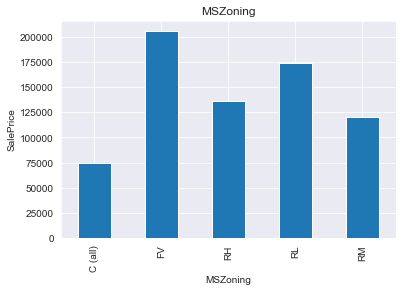

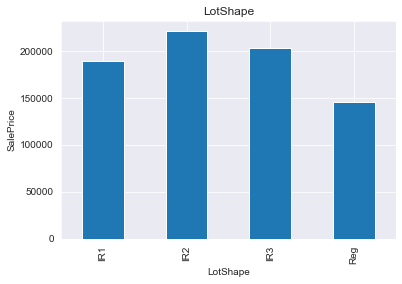

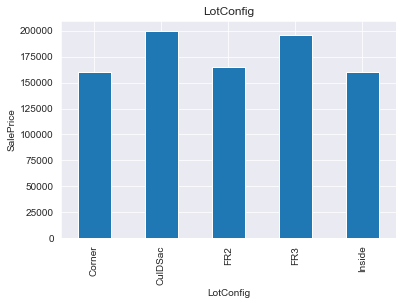

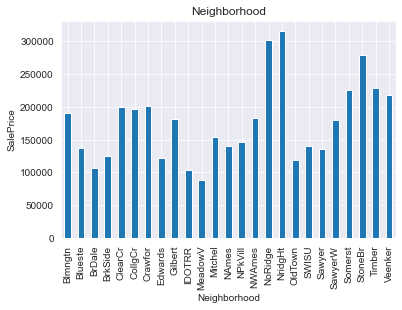

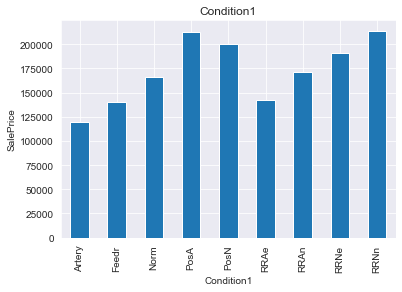

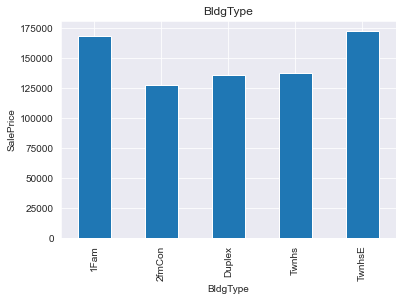

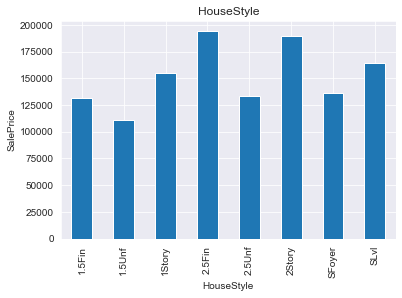

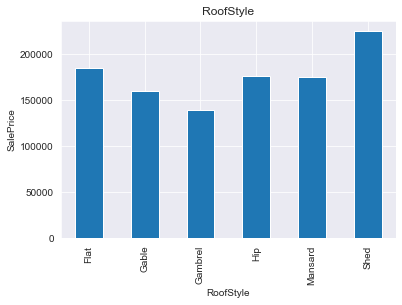

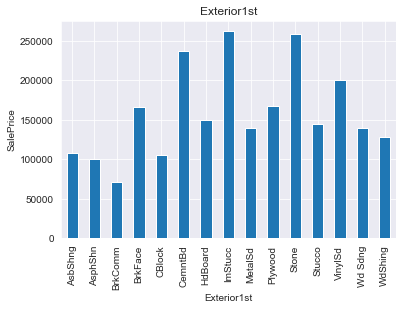

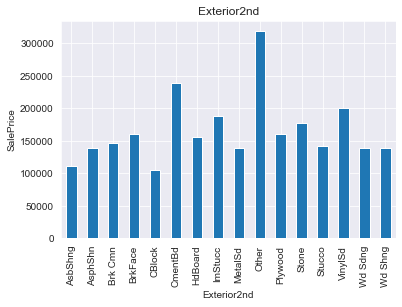

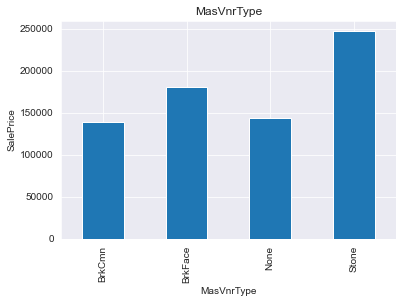

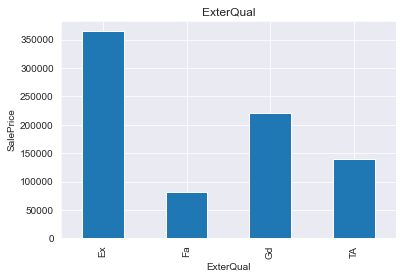

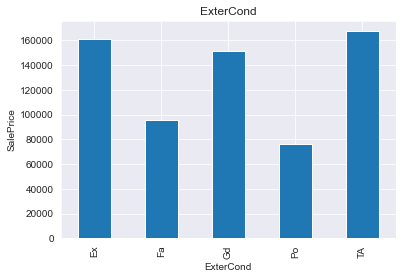

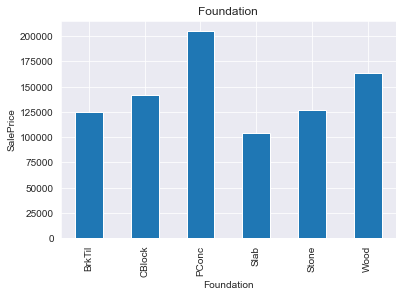

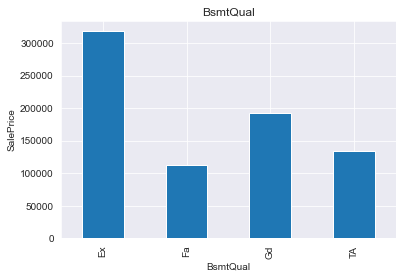

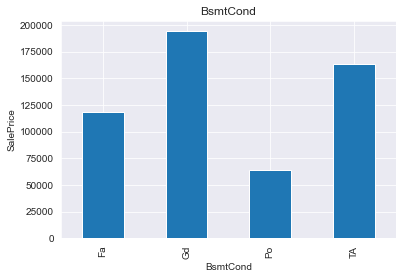

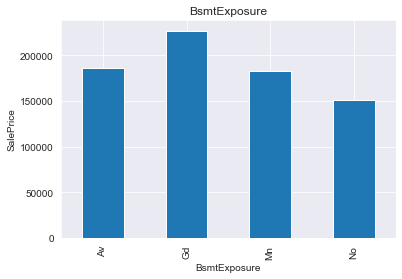

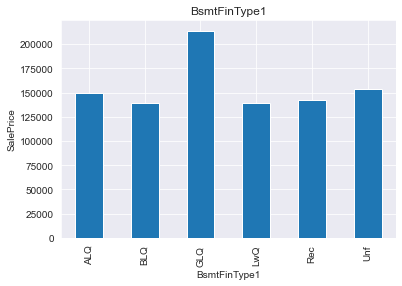

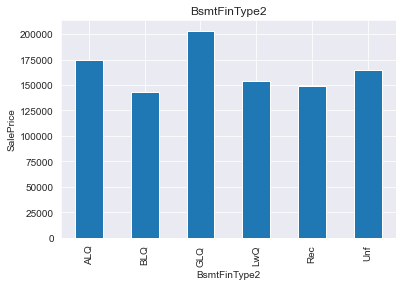

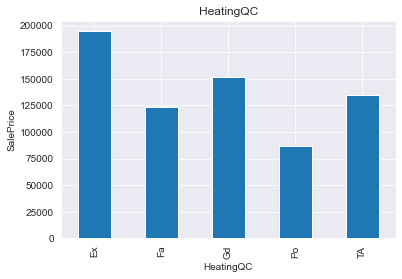

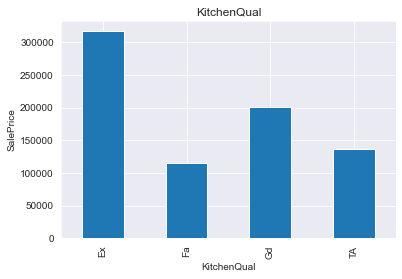

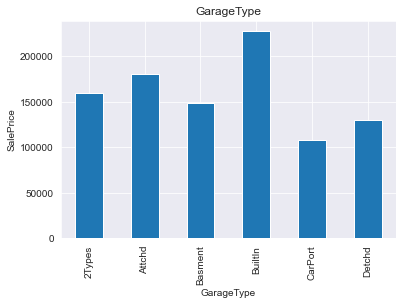

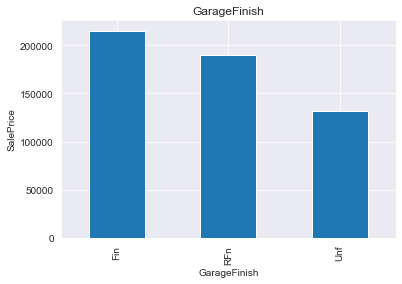

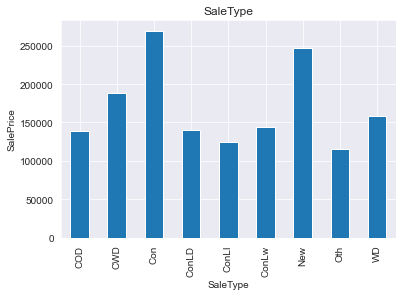

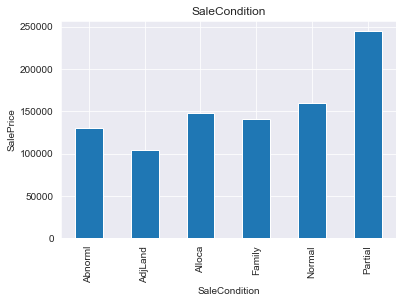

In [127]:
# Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical_features:
    data=hp.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

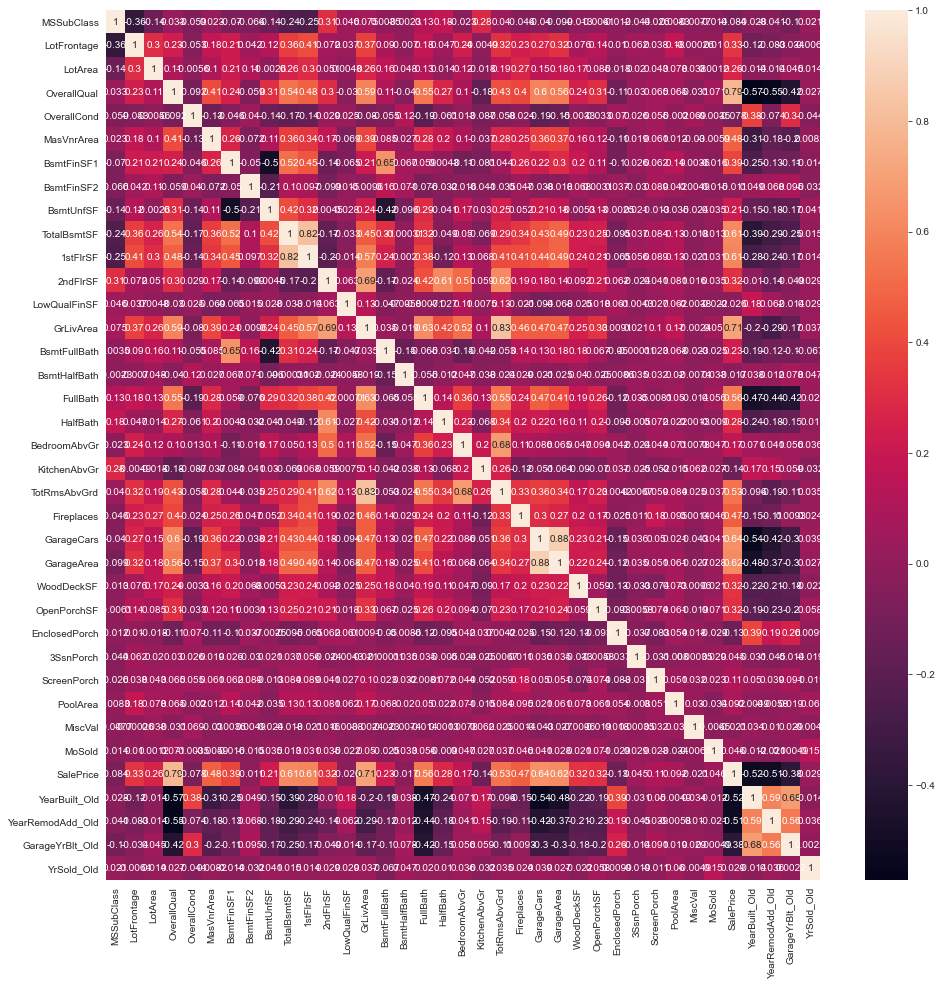

In [128]:
# Plotting correlation matrix 
plt.figure(figsize=(16,16))
sns.heatmap(hp[list(hp.dtypes[hp.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [129]:
# Observing pairs with high correlation
hp.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(25)

YrSold_Old        YrSold_Old         1.000000
GarageCars        GarageArea         0.882475
GrLivArea         TotRmsAbvGrd       0.825489
1stFlrSF          TotalBsmtSF        0.819530
OverallQual       SalePrice          0.790982
GrLivArea         SalePrice          0.708624
2ndFlrSF          GrLivArea          0.687501
GarageYrBlt_Old   YearBuilt_Old      0.681009
BedroomAbvGr      TotRmsAbvGrd       0.676620
BsmtFullBath      BsmtFinSF1         0.649212
GarageCars        SalePrice          0.640409
FullBath          GrLivArea          0.630012
GarageArea        SalePrice          0.623431
TotRmsAbvGrd      2ndFlrSF           0.616423
TotalBsmtSF       SalePrice          0.613581
2ndFlrSF          HalfBath           0.609707
1stFlrSF          SalePrice          0.605852
OverallQual       GarageCars         0.600671
                  GrLivArea          0.593007
YearRemodAdd_Old  YearBuilt_Old      0.592855
OverallQual       YearBuilt_Old      0.572323
GrLivArea         1stFlrSF        

Some pairs have very high correlation and we need to drop one variable out of two in order to reduce multicollinearity 

In [130]:
# Drop one feature out of two where we observe high collinearity of more than 0.8
hp.drop(['TotalBsmtSF','TotRmsAbvGrd','GarageArea'],axis='columns', inplace = True)

In [131]:
hp.shape

(1460, 59)

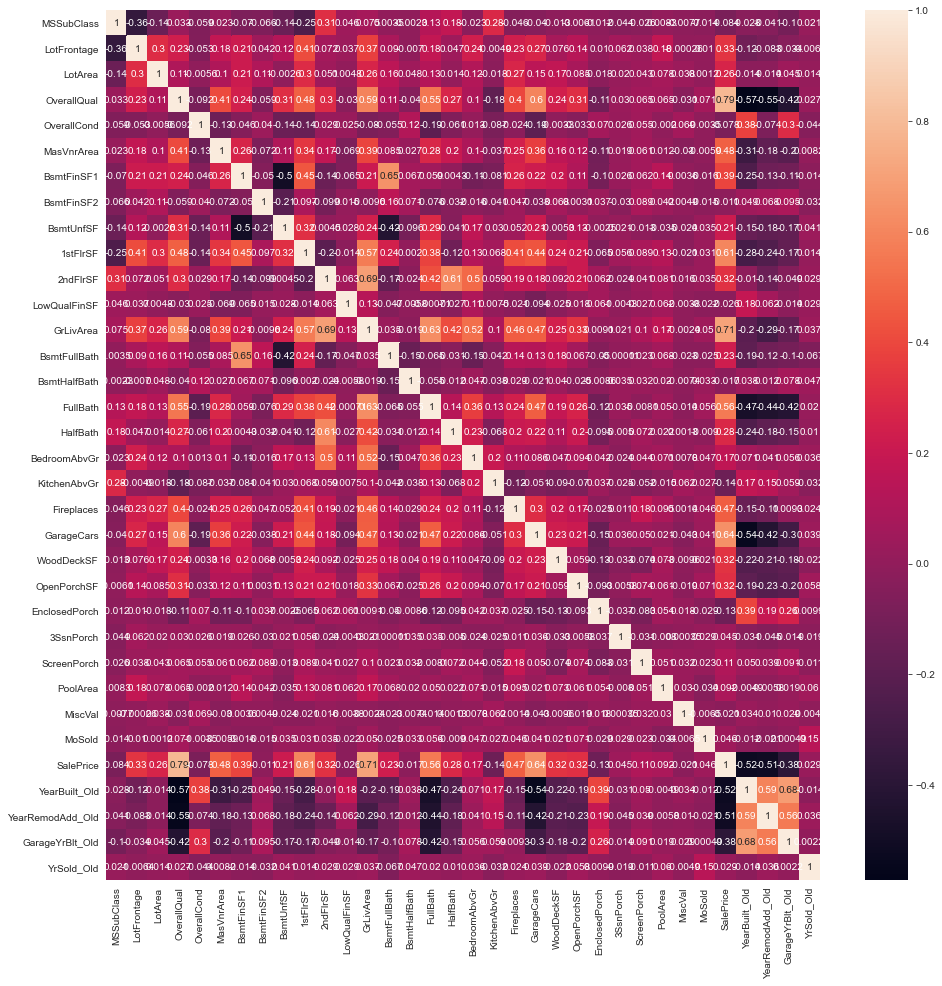

In [132]:
# Plotting correlation matrix again 
plt.figure(figsize=(16,16))
sns.heatmap(hp[list(hp.dtypes[hp.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [133]:
# Observing pairs with high correlation
hp.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(25)

YrSold_Old        YrSold_Old          1.000000
SalePrice         OverallQual         0.790982
                  GrLivArea           0.708624
GrLivArea         2ndFlrSF            0.687501
GarageYrBlt_Old   YearBuilt_Old       0.681009
BsmtFinSF1        BsmtFullBath        0.649212
SalePrice         GarageCars          0.640409
GrLivArea         FullBath            0.630012
HalfBath          2ndFlrSF            0.609707
SalePrice         1stFlrSF            0.605852
OverallQual       GarageCars          0.600671
GrLivArea         OverallQual         0.593007
YearBuilt_Old     YearRemodAdd_Old    0.592855
OverallQual       YearBuilt_Old       0.572323
1stFlrSF          GrLivArea           0.566024
FullBath          SalePrice           0.560664
YearRemodAdd_Old  GarageYrBlt_Old     0.559206
                  OverallQual         0.550684
FullBath          OverallQual         0.550600
GarageCars        YearBuilt_Old       0.537850
YearBuilt_Old     SalePrice           0.522897
GrLivArea    

In [134]:
hp.shape

(1460, 59)

In [135]:
hp.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'YearBuilt_Old', 'YearRemodAdd_Old', 'GarageYrBlt_Old', 'YrSold_Old'],
      dtype='object')

### <font color=brown> Data Transformation </font>

In [136]:
# Identifying all Categorical features and storing them in one variable 
cat_features=[feature for feature in hp.columns if hp[feature].dtypes=='O']
cat_features

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [137]:
hp[cat_features]

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,TA,Attchd,RFn,WD,Normal
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Gd,Detchd,Unf,WD,Abnorml
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,Ex,TA,Attchd,RFn,WD,Normal
1456,RL,Reg,Inside,NWAmes,Norm,1Fam,1Story,Gable,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,TA,TA,Attchd,Unf,WD,Normal
1457,RL,Reg,Inside,Crawfor,Norm,1Fam,2Story,Gable,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
1458,RL,Reg,Inside,NAmes,Norm,1Fam,1Story,Hip,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,Gd,Gd,Attchd,Unf,WD,Normal


In [138]:
# Creating dummies for categorical features 
hp_dummies = pd.get_dummies(hp[cat_features], drop_first=True)
hp_dummies.shape

(1460, 149)

In [139]:
# Concat dummies with original dataframe
hp_withdummies = pd.concat([hp, hp_dummies], axis=1)

In [140]:
cat_features

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [141]:
# Drop categorical variables whose dummies are created and concatinated with original dataframe 

hp_withdummies.drop(['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition'], axis = 1, inplace = True)

In [142]:
hp_withdummies.shape

(1460, 183)

In [143]:
# Reviewing dataset with dummies 
pd.set_option("display.max_columns", 300)
hp_withdummies

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,2,208500,7,7,7.0,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,2,298,0,0,0,0,0,0,5,181500,34,34,34.0,3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,2,0,42,0,0,0,0,0,9,223500,9,8,9.0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [144]:
pd.set_option("display.max_columns", 300)
hp_withdummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 183 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(31), uint8(149)
memory usage: 600.4 KB


### <font color=brown> Data Scaling </font>

In [145]:
# Scaling the train dataset using RobustScaler

from sklearn.preprocessing import RobustScaler         # importing scaling library

scaler=RobustScaler()                                  # creating an object
X=hp_withdummies                                               # Creating new dataset from original dataset
                                        
y=X.pop('SalePrice')                                   # Creating target variable dataset

cols_scale=X.select_dtypes(['float64','int64']).columns  # Find the columns needs scaling

X[cols_scale]=scaler.fit_transform(X[cols_scale])        # Now scaling


In [146]:
from sklearn.model_selection import train_test_split   # Importing necessary library

# Creating x, y train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### <font color=brown> Model Building </font>

#### <font color=green> Model Building using Ridge Regression </font>

In [147]:
# Importing necessary libraries

from sklearn.linear_model import Ridge   
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating an object

ridge=Ridge()

In [148]:

# Initiating Ridge Cross validation with some series of alpha values

parameters={'alpha':[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                    1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,200,400]}


folds=KFold(n_splits=5,shuffle=True,random_state=100)    # Defining folds

# Grid search Cross validation for Ridge regression

ridge_model_cv=GridSearchCV(estimator=ridge,param_grid=parameters,scoring='neg_mean_absolute_error',
                     cv=folds,return_train_score=True,verbose=1)
# Fitting the ridge model

ridge_model_cv.fit(X_train,y_train)

# Creating new dataframe for cv results

ridge_cv_results=pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010326,0.004315,0.004665,0.001510,0.001,{'alpha': 0.001},-20938.062862,-20059.350911,-22526.685739,-21900.770216,-21627.019842,-21410.377914,846.394349,28,-13588.067923,-15857.065724,-16319.314476,-15374.042492,-16268.217645,-15481.341652,1005.836904
1,0.006397,0.000995,0.003424,0.000749,0.01,{'alpha': 0.01},-20901.565639,-20048.485410,-22456.448126,-21884.272580,-21561.247600,-21370.403871,830.331525,27,-13587.475337,-15849.860772,-16314.479406,-15369.736807,-16265.206485,-15477.351762,1004.338051
2,0.007796,0.001665,0.003877,0.000784,0.1,{'alpha': 0.1},-20638.078824,-19940.454118,-21940.738618,-21746.908736,-21125.422366,-21078.320533,732.331409,25,-13586.313739,-15804.856098,-16300.467006,-15347.765618,-16245.125285,-15456.905549,996.491958
3,0.005462,0.000073,0.002815,0.000045,0.2,{'alpha': 0.2},-20445.808133,-19832.889395,-21546.149175,-21624.138435,-20832.304971,-20856.258022,675.561446,24,-13583.296306,-15776.475012,-16302.125112,-15338.285552,-16230.583971,-15446.153190,993.881611
4,0.005373,0.000062,0.002820,0.000043,0.3,{'alpha': 0.3},-20318.292185,-19737.482025,-21248.702172,-21528.571033,-20627.480835,-20692.105650,642.603014,23,-13586.802232,-15756.141324,-16299.246457,-15330.201159,-16224.450145,-15439.368264,989.950261


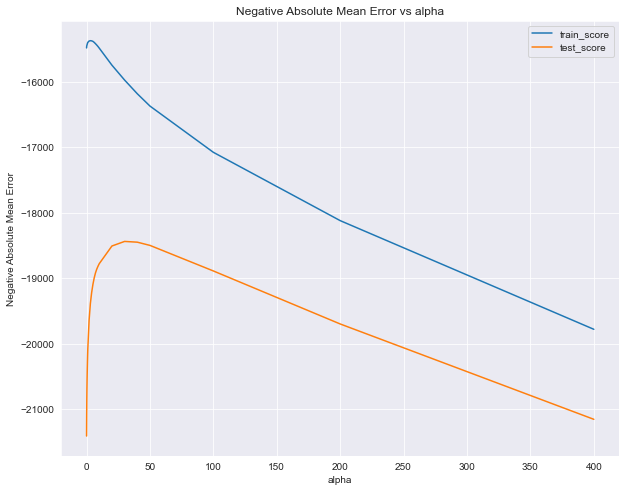

In [149]:
# Setting graph style

sns.set_style('darkgrid')

# Setting figure size

plt.figure(figsize=(10,8))

# Plotting the Ridge with cv rsults with train score and test score

plt.plot(ridge_cv_results['param_alpha'],ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'],ridge_cv_results['mean_test_score'])

# Setting x- label and y- label

plt.xlabel('alpha')
plt.ylabel('Negative Absolute Mean Error')

# Setting the title

plt.title('Negative Absolute Mean Error vs alpha')

# Setting the legend

plt.legend(['train_score','test_score'],loc='upper right')
plt.show()

On the basis of Graph and getting best param, it can be observed that ideal value for alpha is 30

In [150]:
print(ridge_model_cv.best_params_)

{'alpha': 30}


In [151]:
alpha=30                   # setting the alpha value as 30

ridge=Ridge(alpha=alpha)   # Creating object with alpha 30 value
ridge.fit(X_train,y_train) # Fitting the ridge
ridge.coef_   

array([-8.51628650e+03, -2.09340453e+03,  1.55001321e+03,  2.28269963e+04,
        5.26158021e+03,  4.87589239e+03,  1.75122546e+03,  7.33782947e+00,
        2.44535824e+03,  6.53716330e+03,  1.46573267e+04, -2.91985914e+01,
        2.16292856e+04,  8.72916426e+03,  1.51111963e+03,  6.49144124e+03,
        2.96092249e+03, -5.20046543e+02, -4.73676417e+03,  5.54094579e+03,
        1.10153000e+04,  2.88999563e+03, -4.26634398e+02,  1.26561717e+01,
        4.98954011e+01,  2.69035656e+01, -1.50123891e+01, -5.65878768e-01,
       -7.89057794e+02, -6.67021106e+03, -3.69017507e+03, -3.99821109e+03,
        2.00609698e+03,  2.73428203e+03,  6.61901680e+02,  4.52761392e+03,
       -3.47578548e+03,  1.10819716e+03, -6.83482146e+03,  4.71239365e+02,
        6.35051305e+03, -4.80596231e+03, -9.50646622e+02, -7.44725217e+02,
       -2.55893231e+02, -3.05673763e+02,  1.49859164e+03,  1.03854571e+03,
       -5.81936157e+03,  1.10349647e+04, -1.32280758e+04, -6.76021219e+03,
       -2.01428852e+03,  

In [152]:
print('R2 value on Train set using Ridge Regression:',ridge.score(X_train,y_train))   # Printing the r2 value for train set
print('R2 value on Test set using Ridge Regression:',ridge.score(X_test,y_test))     # Printing the r2 value for test set

R2 value on Train set using Ridge Regression: 0.8725867196419819
R2 value on Test set using Ridge Regression: 0.8625530283371114


#### <font color=green> Model Building using Lasso Regression </font>

In [153]:
# Importing the necessary library

from sklearn.linear_model import Lasso

lasso=Lasso()   # Creating an object

# Grid search Cross validation for Lasso regression

lasso_model_cv=GridSearchCV(estimator=lasso,param_grid=parameters,scoring='neg_mean_absolute_error',cv=folds,
                           return_train_score=True,verbose=1)
# Fitting the lasso model

lasso_model_cv.fit(X_train,y_train)

# Creating new dataframe for lass cv results
lasso_cv_results=pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   12.8s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.106467,0.009721,0.003432,0.000319,0.001,{'alpha': 0.001},-20934.444868,-20060.310489,-22584.496741,-21924.281791,-22004.848572,-21501.676492,894.825653,28,-13588.301766,-15857.178651,-16319.113033,-15374.715179,-16268.204686,-15481.502663,1005.707398
1,0.099128,0.007010,0.003327,0.000170,0.01,{'alpha': 0.01},-20933.186478,-20059.820277,-22578.696690,-21923.016795,-21921.823228,-21483.308693,884.812613,27,-13588.293265,-15856.936031,-16318.962094,-15374.543396,-16268.051182,-15481.357194,1005.646965
2,0.096226,0.006011,0.003148,0.000089,0.1,{'alpha': 0.1},-20920.425563,-20054.917109,-22539.351084,-21911.112658,-21600.405195,-21405.242322,853.067582,26,-13588.245604,-15854.528315,-16317.335363,-15372.811948,-16266.350056,-15479.854257,1004.984800
3,0.099705,0.005998,0.003273,0.000166,0.2,{'alpha': 0.2},-20905.985083,-20049.342162,-22516.511966,-21906.205123,-21579.815920,-21391.572051,848.899116,25,-13588.269260,-15852.041823,-16315.488577,-15370.934101,-16264.511093,-15478.248971,1004.234949
4,0.101824,0.004366,0.003372,0.000260,0.3,{'alpha': 0.3},-20889.753604,-20043.716703,-22493.665787,-21901.297564,-21559.166743,-21377.520080,844.993158,24,-13588.063928,-15849.777101,-16313.696033,-15369.068399,-16262.801347,-15476.681362,1003.616957


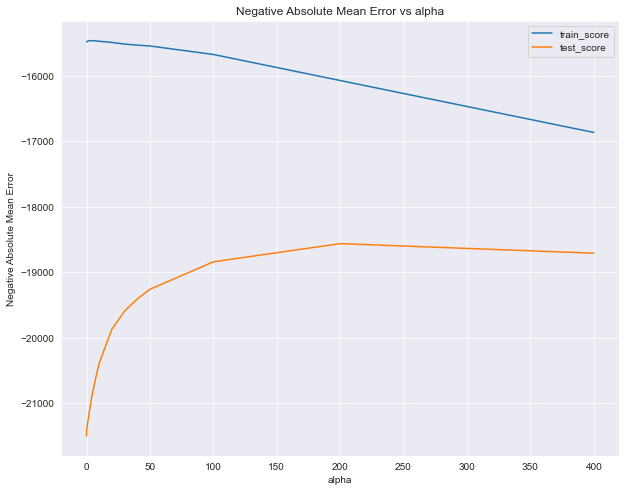

In [154]:

sns.set_style('darkgrid')

# Setting figure size

plt.figure(figsize=(10,8))

# Plotting the Ridge with cv rsults with train score and test score

plt.plot(lasso_cv_results['param_alpha'],lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'],lasso_cv_results['mean_test_score'])

# Setting x- label and y- label

plt.xlabel('alpha')
plt.ylabel('Negative Absolute Mean Error')

# Setting the title

plt.title('Negative Absolute Mean Error vs alpha')

# Setting the legend

plt.legend(['train_score','test_score'],loc='upper right')
plt.show()

On the basis of Graph and getting best param, it can be observed that ideal value for alpha is 200

In [155]:
print(lasso_model_cv.best_params_)

{'alpha': 200}


In [156]:
# Setting the alpha value as 200
alpha=200                               
lasso1=Lasso(alpha=alpha,max_iter=10e5)  # Creating object with alpha 200 value
lasso1.fit(X_train,y_train)              # Fitting the Lasso
lasso1.coef_

array([-9.02540286e+03, -2.36547950e+03,  1.56546673e+03,  2.33406029e+04,
        5.22395370e+03,  3.16643667e+03, -0.00000000e+00, -1.43267315e+00,
        1.28474896e+03, -0.00000000e+00,  6.20291239e+03, -4.40049404e+01,
        3.09708622e+04,  9.26242187e+03,  0.00000000e+00,  4.00619459e+03,
        0.00000000e+00, -4.42929778e+02, -3.46695600e+03,  4.30624899e+03,
        1.00175914e+04,  2.40222634e+03, -1.13478384e+02,  1.01316630e+01,
        5.09490456e+01,  2.94140236e+01, -1.50935425e+01, -4.88897947e-01,
       -6.23816955e+02, -9.59033559e+03, -3.21176127e+03, -3.57647137e+03,
        1.39227482e+03,  0.00000000e+00,  0.00000000e+00,  5.59124807e+03,
       -9.83585795e+02,  0.00000000e+00, -3.89486713e+03,  0.00000000e+00,
        5.41365589e+03, -2.14340037e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.86713771e+04, -1.40344328e+04, -0.00000000e+00,
       -0.00000000e+00,  

In [157]:
print('R2 value on Train set using Lasso Regression:',lasso1.score(X_train,y_train))   # Printing the r2 value for train set
print('R2 value on Test set using Lasso Regression:',lasso1.score(X_test,y_test))     # Printing the r2 value for test set
print(np.sum(lasso1.coef_!=0))         # Number of coefficients not equal to 0


R2 value on Train set using Lasso Regression: 0.8753457930910162
R2 value on Test set using Lasso Regression: 0.8603871462540419
76


In [158]:
# Finding Model coefficients 
model_param = list(lasso1.coef_)
model_param.insert(0,lasso1.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso1_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso1_coef.columns = ['Featuere','Coef']

#### <font color=green> Feature Importance </font>

In [159]:
# View top 10 features that contribute positively for model creation 
lasso1_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,190436.444697
59,Neighborhood_NridgHt,45571.176323
13,BsmtFullBath,30970.862227
60,Neighborhood_OldTown,28835.251836
4,OverallCond,23340.602926
65,Neighborhood_StoneBr,19323.338071
50,Neighborhood_Edwards,18671.377113
143,BsmtExposure_Mn,17447.695182
95,Exterior1st_CBlock,13386.325749
70,Condition1_PosA,12475.797919


In [160]:
# View bottom 10 features that contribute negatively for model creation 
lasso1_coef.sort_values(by='Coef',ascending=False).tail(10)

,Featuere,Coef
160,KitchenQual_Gd,-7564.247380
145,BsmtFinType1_BLQ,-8715.779550
1,LotFrontage,-9025.402857
137,BsmtQual_Gd,-9104.195580
30,YearRemodAdd_Old,-9590.335591
51,Neighborhood_Gilbert,-14034.432765
162,GarageType_Attchd,-18630.310764
139,BsmtCond_Gd,-18786.796881
161,KitchenQual_TA,-19747.458781
138,BsmtQual_TA,-25031.591463


## <font color=brown> Conclusion </font>

1. We have analysed the Data, imputed the missing values, dropped columns which were not significant and then created dummies for categorical columns 

2. Once the Dataset was clean, we have applied Ridge Regression to create the model and predict the values on Test Data. <br>
    R2 Score on the Train Data using Ridge Regression = 0.8725 <br>
    R2 Score on the Test Data using Ridge Regression = 0.8625 <br>
    
3. Then we have applied Lasso Regression to create the model and predict the values on Test Data.<br>
    R2 Score on the Train Data using Lasso Regression = 0.8753 <br>
    R2 Score on the Test Data using Lasso Regression = 0.8603 <br>
    
#### Data was split into Train and Test Set. We have also used Grid Search CV technique for cross validation among Train set <br>
    
#### We have used Robust Scaler to scale the Data as "Robust Scaler" handles the Outliers more efficiently than other techniques.<br>

#### Lasso and Ridge Regression predicts the values with 86% accuracy on Test set.<br>
    
#### Both the Models are giving good accuracy on Train and Test set. We decide to keep Model built using Lasso Regression because it gave few extra benefits like dimensionality reduction which keeps the valuable fetaures intact and eliminates less important features. <br>


### Top 10 Features that contribute Positively for Model Creation are:
MSSubClass <br>
Neighborhood_NridgHt<br>
BsmtFullBath<br>
Neighborhood_OldTown<br>
OverallCond<br>
Neighborhood_StoneBr<br>
Neighborhood_Edwards<br>
BsmtExposure_Mn<br>
Exterior1st_CBlock<br>
Condition1_PosA<br>


#### Optimal value of lambda for Ridge Regression is 30 and for Lasso Regression is 200 as per created Model.<br>

